In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import os
import umap

In [2]:
pjoin = os.path.join

In [3]:
path='/home/alaha/Arnab/Work/CernOpenData/NNTraining/data/'
filename='OpendataFake_Oct1_TrainTest.txt'

filepath=pjoin(path,filename)

In [23]:
#Read the file
col_names=['Event','Index','id','leptonPt','sigdxy','sigdz','iso','ratioPt','chHEF','chEmEF','neHEF','neEmEF','neM','chM','label']
cols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

fulldata = pd.read_csv(filepath,sep=' ', index_col=None, usecols=cols, names=col_names)


In [24]:
### Print stats
print('No of Prompt leptons=',fulldata[fulldata['label']>0].shape[0])
print('No of Fake leptons=',fulldata[fulldata['label']==0].shape[0])

No of Prompt leptons= 43710
No of Fake leptons= 13561


In [25]:
### No of train events and evaluated points
N_prompt=10000
N_fake=10000

df_equal=pd.concat([fulldata[(fulldata['label']>0)].sample(N_prompt),fulldata[(fulldata['label']==0)].sample(N_fake)])



In [26]:
def select_columns(data_frame, column_names):                                                                                           
    new_frame = data_frame.loc[:, column_names]                                                                                         
    return new_frame 

selcols=['leptonPt','sigdxy','sigdz','ratioPt','chHEF','chEmEF','neHEF','neEmEF','neM','chM','label']

data=select_columns(df_equal,selcols)

In [27]:
data

,leptonPt,sigdxy,sigdz,ratioPt,chHEF,chEmEF,neHEF,neEmEF,neM,chM,label
14447,38.8108,-0.436560,-1.686810,0.763086,0.157792,0.000000,0.042703,0.064364,12.0,12,1
1020,67.3299,3.510900,-2.864170,0.413522,0.302260,0.000000,0.049106,0.186787,24.0,21,1
6259,32.4654,-0.176407,1.872370,0.730496,0.227721,0.726045,0.000000,0.046234,4.0,15,1
6631,83.9117,-0.150929,1.515770,0.884145,0.105391,0.868536,0.000000,0.026073,3.0,14,1
45482,81.3046,0.749197,0.157846,0.847253,0.100278,0.821690,0.025021,0.053011,8.0,9,1
...,...,...,...,...,...,...,...,...,...,...,...
50555,67.2903,-4.363660,6.140710,0.588434,0.720416,0.000000,0.000000,0.279584,5.0,24,0
40558,26.5399,-0.780337,-12.544700,0.615912,0.304399,0.607447,0.036809,0.051344,6.0,11,0
10990,36.8921,0.982907,1.052230,0.584457,0.357686,0.573347,0.018334,0.050633,5.0,17,0
27238,26.4643,-10.817000,-8.026690,0.523409,0.377247,0.000000,0.009718,0.121565,13.0,24,0


In [28]:
train_df=data.iloc[::2] #even
test_df=data.iloc[1::2] #odd
print('Train dataset, Prompt leptons =',train_df[train_df['label']>0].shape[0])
print('Train dataset, Fake leptons =',train_df[train_df['label']==0].shape[0])
print('Test dataset, Prompt leptons =',test_df[test_df['label']>0].shape[0])
print('Test dataset, Fake leptons =',test_df[test_df['label']==0].shape[0])
train_df.head()

Train dataset, Prompt leptons = 5000
Train dataset, Fake leptons = 5000
Test dataset, Prompt leptons = 5000
Test dataset, Fake leptons = 5000


,leptonPt,sigdxy,sigdz,ratioPt,chHEF,chEmEF,neHEF,neEmEF,neM,chM,label
14447,38.8108,-0.436560,-1.686810,0.763086,0.157792,0.000000,0.042703,0.064364,12.0,12,1
6259,32.4654,-0.176407,1.872370,0.730496,0.227721,0.726045,0.000000,0.046234,4.0,15,1
45482,81.3046,0.749197,0.157846,0.847253,0.100278,0.821690,0.025021,0.053011,8.0,9,1
37723,34.8132,-0.861468,-0.846509,0.833967,0.159024,0.000000,0.030501,0.006409,2.0,9,1
15228,20.2325,1.052530,1.162900,0.784751,0.656593,0.000000,0.000000,0.343407,6.0,10,1


In [29]:
## Train Dataset after selection
X_train,y_train = train_df.values[:,:-1],train_df.values[:,-1]
print(X_train.shape, y_train.shape)

## Train Dataset after selection
X_test,y_test = test_df.values[:,:-1],test_df.values[:,-1]
print(X_test.shape, y_test.shape)

(10000, 10) (10000,)
(10000, 10) (10000,)


### normalizing the inputs X axis range

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler=StandardScaler()
scaler=MinMaxScaler((-1,1))
scaler.fit(X_train)

## Transform train and test data
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

# TSNE
-  https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

In [31]:
from sklearn import manifold


In [32]:
n_components=2
perplexity=50

tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
    )

In [33]:
x_pca = tsne.fit_transform(X_train)

In [12]:
####PCA
#model_pca=PCA()
import umap
model=umap.UMAP(n_neighbors=20, min_dist=0.4, n_components=2,metric='euclidean')
model.fit(X_train)
x_pca = model.transform(X_train)


In [37]:
#Make a dataframe
#PCA
df_pca=pd.DataFrame()
df_pca["y"] = y_train
df_pca["comp1_pca"] = x_pca[:,0]
df_pca["comp2_pca"] = x_pca[:,1]

df_pca = df_pca.sample(1000)

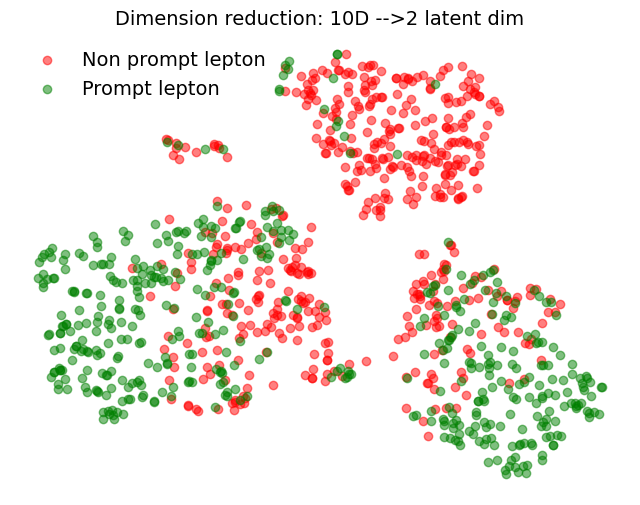

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[df_pca['y']==0]['comp1_pca'],df_pca[df_pca['y']==0]['comp2_pca'],c='red',alpha=0.5,label='Non prompt lepton')
plt.scatter(df_pca[df_pca['y']==1]['comp1_pca'],df_pca[df_pca['y']==1]['comp2_pca'],c='green',alpha=0.5,label='Prompt lepton')
plt.xlabel('First TSNE component',fontsize=14)
plt.ylabel('Second TSNE component',fontsize=14)
plt.title(f'Dimension reduction: {X_train.shape[1]}D -->{x_pca.shape[1]} latent dim',fontsize=14)
plt.legend(frameon=False,fontsize=14)
#plt.show()
plt.axis('off')
plt.savefig('TSNE-prompt-fake_v1.png',facecolor='white',edgecolor='white',dpi=250,bbox_inches='tight')
plt.savefig('TSNE-prompt-fake_v1.pdf')


In [17]:
def addPCAScore(df,pcamodel):
    
    selcols=['leptonPt','sigdxy','sigdz','ratioPt','chHEF','chEmEF','neHEF','neEmEF','neM','chM','label']
    data=select_columns(df,selcols)
    
    X_test,y_test = data.values[:,:-1],data.values[:,-1]
    X_test=scaler.transform(X_test)
    
    x_test_pca = pcamodel.transform(X_test)
    
    df['PCA1']=x_test_pca[:,0]
    df['PCA2']=x_test_pca[:,1]
    
    return df
    

In [58]:
df_PCA= addPCAScore(df_equal.sample(5000),model)

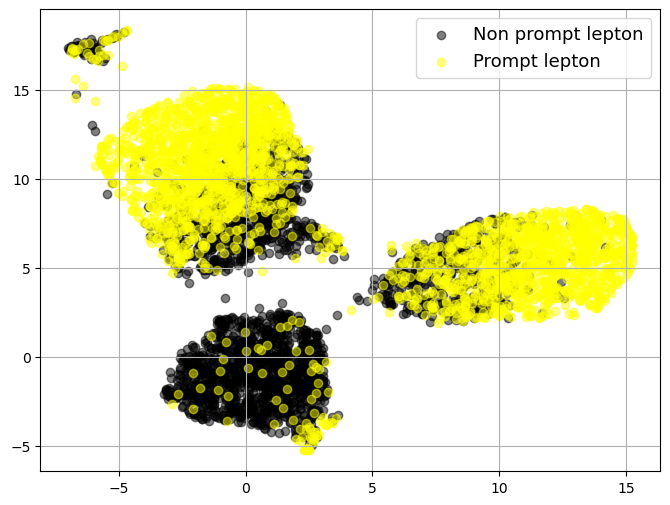

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(df_PCA[df_PCA['label']==0]['PCA1'],df_PCA[df_PCA['label']==0]['PCA2'],c='black',alpha=0.5,label='Non prompt lepton')
plt.scatter(df_PCA[df_PCA['label']==1]['PCA1'],df_PCA[df_PCA['label']==1]['PCA2'],c='yellow',alpha=0.5,label='Prompt lepton')
plt.legend(loc='upper right',fontsize='13')
plt.grid()
plt.show();


/tmp/ipykernel_737501/3444152650.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label=z)


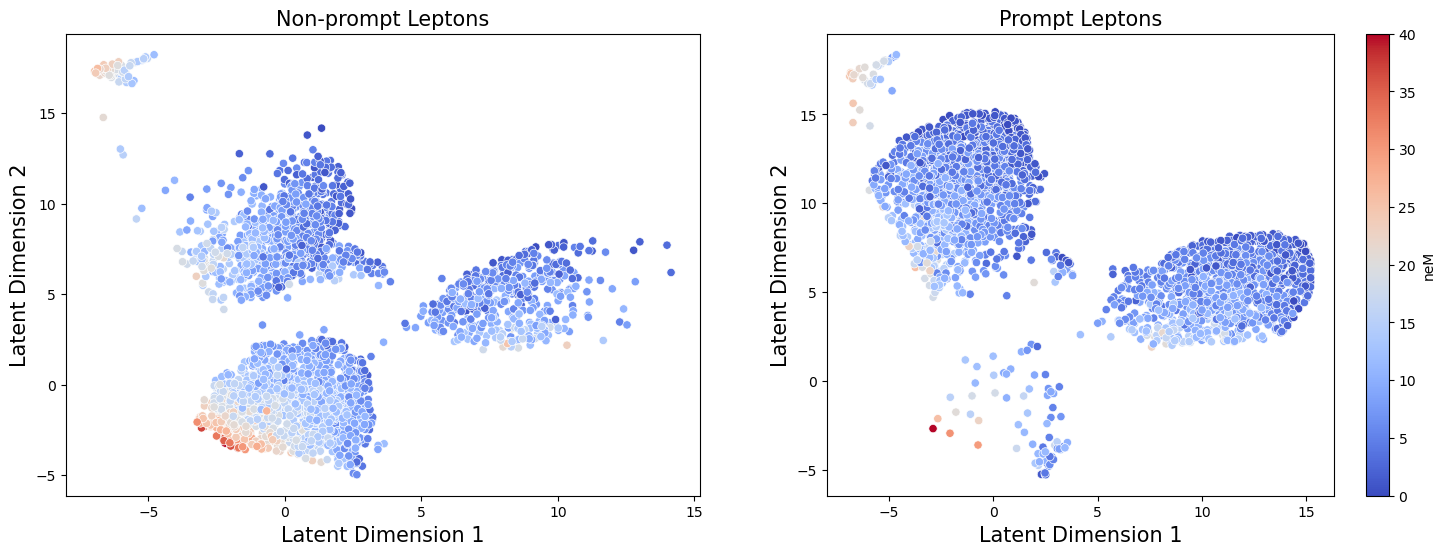

In [67]:
z='neM'

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
scatter_plot=sns.scatterplot(data=df_PCA[df_PCA['label']==0], x='PCA1', y='PCA2', hue=z, palette='coolwarm',legend=False)
plt.title("Non-prompt Leptons",fontsize=15)
plt.xlabel('Latent Dimension 1',fontsize=15)
plt.ylabel('Latent Dimension 2',fontsize=15)


plt.subplot(1,2,2)
scatter_plot=sns.scatterplot(data=df_PCA[df_PCA['label']==1], x='PCA1', y='PCA2', hue=z, palette='coolwarm',legend=False)
plt.title("Prompt Leptons",fontsize=15)
plt.xlabel('Latent Dimension 1',fontsize=15)
plt.ylabel('Latent Dimension 2',fontsize=15)

norm = plt.Normalize(df_PCA[z].min(), df_PCA[z].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # No data for color bar creation, this line resolves the error
plt.colorbar(sm, label=z)

#plt.colorbar(label='Color Value')

plt.show();
